### Scientific Question

#### Since the research shows that Mycobacterium Vaccae is able to stimulate mouse T lymphocytes to generate cytokines, is it possible for Mycobacterium Vaccae to stimulate human T lymphocytes to produce the same cytokines?

Recent studies demonstrate that immunization with Mycobacterium vaccae is able to stimulate inflammatory pathways (Smith, David G et al. “Identification and characterization of a novel anti-inflammatory lipid isolated from Mycobacterium vaccae, a soil-derived bacterium with immunoregulatory and stress resilience properties.” Psychopharmacology vol. 236,5 (2019): 1653-1670. doi:10.1007/s00213-019-05253-9).

Since Interferon pathway is part of the innate immune system and they are considered as the first line of defense against infection, they might be the target of Mycobacterium vaccae. Interferon receptor is responsible for the binding of type I interferon cytokines. IFNAR1 is a transmembrane protein and it is one of two subunits of Inteferon receptor 1. Upon binding of Inteferon, the interferon receptor is able to activate the JAK-STAT signalling pathway, along with MAPK, PI3K, and Akt signaling pathways. Leading to activation of a variety of innate immuno-pathways to induce innate immune response against infections (Piehler, Jacob et al. “Structural and dynamic determinants of type I interferon receptor assembly and their functional interpretation.” Immunological reviews vol. 250,1 (2012): 317-34. doi:10.1111/imr.12001). 

### Scientific Hypothesis

If the interferon receptors of human T lymphocytes are similar to the interferon receptors of mouse T lymphocytes, then Mycobacterium Vaccae might be able to have the same impact which is to stimulate the human T lymphocytes to activate the human immune pathways to produce cytokines for immunotherapy.

There are 109 interferon receptor 1 structure. I selected the human interferon receptor 1 and the mouse interferon receptor 1 to compare because the previous studies of Mycobacterium Vaccae was conducted on mouse model, and since my hypothesis wants to know whether there is significant difference between mouse interferon receptor and human interferon receptor. I will first perform pairwise sequence alignment and Multiple sequence alignment and sequence logo to compare the similarity between the genes of human interferon receptor 1 and mouse interferon receptor 1. I also added chicken and pig interferon receptor 1 gene for multiple sequence alignment and sequence logo to demonstrate that the similarities or differences in mouse and human genes are not just completely random chance.

I will also perform homology modeling and 3D protein measurements to further analyze the structural difference between the mouse interferon receptor 1 and human interferon receptor 1. This can determine the secondary and tertiary structural differences or similarities between the mouse model and human model to answer my hypothesis.

The gene data I took are from searching "Interferon receptor 1" on ncbi and I took the 4 different gene models to download as fasta file and that is the data I imported here.

The 3D structure data I took is from the prediction of the homology model of the mouse interferon receptor 1 subunit by Swiss Protein from the human interferon receptor 1 protein model.

Source of Data:

NCBI: The National Center for Biotechnology Information (NCBI) provides a large suite of online resources for biological information and data, including the GenBank®️ nucleic acid sequence database and the PubMed database of citations and abstracts published in life science journals.


Data of human interferon receptor 1: https://www.ncbi.nlm.nih.gov/gene/15975

Data of mouse interferon receptor 1: https://www.ncbi.nlm.nih.gov/gene/3454

Data of pig interferon receptor 1: https://www.ncbi.nlm.nih.gov/gene/396658

Data of chicken interferon receptor 1: https://www.ncbi.nlm.nih.gov/gene/395665

Swiss Protein mouse interferon receptor 1 predicted model: https://swissmodel.expasy.org/assess/8d87Bk/01

Swiss Protein human interferon receptor 1 template model: https://swissmodel.expasy.org/templates/3se3.1

### Part 1: Load the Packages

SeqIO: This pacakge provides a simple uniform interface to read and write sequences in various sequence file formats

Bio.Seq: This package provides objects to represent biological sequences with alphabets

Bio.pairwise2: This package contains pairwise sequence alignment method using a dynamic programming algorithm

Bio.Align: This package imports multipleSeqAlignment for dealing with sequence alignments

nglview: This package provide functions to view molecular structures and trajectories

Bio.PDB: This package allows us to read in pdb file and manipulate polypeptide structures

Bio.SeqUtils.ProtParam: This packages contains methods for protein analysis

logomaker: This package is able generate publication-quality sequence logos from DNA, RNA, or protein sequences

Bio.Align.Applications: This package provides Alignment command line tool wrappers like Mafft for multiple sequence alignment

glob: This package finds all the pathnames matching a specified pattern, this allows me to read in all the fasta file for multiple sequence alignment

In [1]:
#conda install -c bioconda mafft

In [2]:
#pip install logomaker

In [45]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.PDB import *
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Align.Applications import MafftCommandline
from Bio.Align import MultipleSeqAlignment
from glob import glob
import nglview as nv
import logomaker as lm

### Pairwise Sequence Alignment & Multiple Sequence Alignment & Sequence Logo

Pairwise sequence alignment aligns two sequences and perform a dynamic programming method to identify any pattern between the two sequences.

Multiple sequence alignment is able align multiple sequences(protein, RNA, or DNA) rather than two and identify any common patterns between these sequences.

I will perform pairwise sequence alignment between mouse and human interferon receptor 1 DNA model to produce a alignment score to determine any pattern between these two sequences.
I will then use human, mouse, pig, and dog interferon receptor 1 DNA sequences to perform multiple sequence alignment and sequence logos to determine any similarities or differences in gene alignment

In [4]:
# read in and print mouse interferon receptor 1 fasta sequence
# and define it as global variable mouse_ifnar1
mouse_ifnar1 = SeqIO.read('ifnar1_mouse.fna', 'fasta')
print(mouse_ifnar1)
print(len(mouse_ifnar1.seq))

ID: NC_000082.7:91281016-91307411
Name: NC_000082.7:91281016-91307411
Description: NC_000082.7:91281016-91307411 Ifnar1 [organism=Mus musculus] [GeneID=15975] [chromosome=16]
Number of features: 0
Seq('TTTTTTTTGAGACAGGGTTTGTGTGTGGAGCCTTGGCTGTCCTGGAACTCACTC...AAA')
26396


In [5]:
# read in and print human interferon receptor 1 fasta sequence
# and define it as global variable human_ifnar1
human_ifnar1 = SeqIO.read('ifnar1_human.fna', 'fasta')
print(human_ifnar1)
print(len(human_ifnar1.seq))

ID: NC_000021.9:33324395-33359864
Name: NC_000021.9:33324395-33359864
Description: NC_000021.9:33324395-33359864 IFNAR1 [organism=Homo sapiens] [GeneID=3454] [chromosome=21]
Number of features: 0
Seq('GCTCTCGCTCTGCACACAGCAACGGTCTGGTCGCTCAGCCACTTCCTCCTTCCA...CCA')
35470


In [6]:
# read in and print pig interferon receptor 1 fasta sequence
# and define it as global variable pig_ifnar1
pig_ifnar1 = SeqIO.read('pig_ifnar1.fasta', 'fasta')
print(pig_ifnar1)

ID: NC_010455.5:196925731-196951398
Name: NC_010455.5:196925731-196951398
Description: NC_010455.5:196925731-196951398 IFNAR1 [organism=Sus scrofa] [GeneID=396658] [chromosome=13]
Number of features: 0
Seq('GGAGGGGCGGGGCGCGAGCGGCGCGAGGGGACAGGGCCGCACGGGTCCCAGGTC...CCC')


In [7]:
# read in and print chicken interferon receptor 1 fasta sequence
# and define it as global variable chicken_ifnar1
chicken_ifnar1 = SeqIO.read('chicken_ifnar1.fasta', 'fasta')
print(pig_ifnar1)

ID: NC_010455.5:196925731-196951398
Name: NC_010455.5:196925731-196951398
Description: NC_010455.5:196925731-196951398 IFNAR1 [organism=Sus scrofa] [GeneID=396658] [chromosome=13]
Number of features: 0
Seq('GGAGGGGCGGGGCGCGAGCGGCGCGAGGGGACAGGGCCGCACGGGTCCCAGGTC...CCC')


In [8]:
# check mouse sequence and define it as global variable mouse_seq
mouse_seq = mouse_ifnar1.seq
print(mouse_seq)

TTTTTTTTGAGACAGGGTTTGTGTGTGGAGCCTTGGCTGTCCTGGAACTCACTCTCTAGTCCAGGCTGGCCTCGAACTCAGAAACCGCCTGCCTCTGCCTCCCAAGTGCTGGGATTAAAGGCATGTGCCACCACGCCCGGCATAACAAATAAGTTTCTTACTTTTTTTTTTTTTTTTTTCTTTTTTTGGTTTTTCGTGACAGGGTTTCTCTGTATAGGCCTGGCTGTCCTGGAGCTCACTTTGTAGACCAGGCTGGCCTCGAACTCAGAAATCCGCCTGCCTCCGCCTCCCGAGTGCTGGGATTAAAGGCGTGCGCCACCACGCCCGGCCCAACAAATAAGTTTCTTTATAAGATAGTAATCAGACAGAGACGGAGTTAAGGGGGTAGAGAGAGGGCTCAGTGGTTTAAGGGCACGTGCAGAGGACTGGCGTACAAACATGGTAGCTCGGAAGATCAGTAACTTTAATACCAGGGTATCTGCGCTCTACTGGCCTCCATGGGTACCAGGCACGCATATATGTACGGTGCACATATATGCATGCATGCATGCATGCAAAACACTCATACACATAAAACCAGCCTAAAACCACATTATTAGACAAAAGATCCAAACGCTGCATAATTCAAAACCCAAAGATTGAGCGAGTCACAACAGCAAACCATCCCACAAAATCAGGGAATCAAGTATAAAGATCTTGTGCAGTTGAGATAAAAGTGTTGCCGGCGCCTTCCAGGTCCCAGAGTCATTTGATCCACGGCCTCCAGGGATCCCCACACCAGGATTCGAGCCAGTGGACTAGTAACCCCCGGGGCAACGCCTCCGAACCCCCTCCGGACAAAAACAGGAAGCTGAGCCCGGAAGGAGGAGGGGCTGCGCAGGCGCACTGACTGCACCCCGCTTTCCTCTCAGGAGTCTAAGGACAATGCTGGGCAGTCTTTCCGGAAGTGGGGGCGGAGCGTGGCAGGGACCTCAAAGTCCCCAGGCCTTGACTGGACCGC

In [9]:
# check human sequence and define it as global variable human_seq
human_seq = human_ifnar1.seq
print(human_seq)

GCTCTCGCTCTGCACACAGCAACGGTCTGGTCGCTCAGCCACTTCCTCCTTCCAGCCTCATCTGGTTCCCAGGCCGCTGGGGACTCCCAACGCCACTGTCCAAGACTCTAGGGTCAGCAAGCGCCCCGGGCGGAGAAGGGCGAGGACGAAGAGCGCCGGGCCGCGACCAGGAGCCCACCCGCGCCCTCCGACTGCAGACATGGGGAAGAGACGCGGGAACTCCAAAGTCGCTGGGTCTGCGCAGGTGTGTGCCGCGATCCTGTGAAGGTCAAGGCCTCCTGTGAGGGGGAGTCGTCCTGGAATGCGATGGTGAAGTGCTCCAGACCGGCCATAGGCCGGAAAGAGTGAGGAAGAAGAGAATGCAGGAGGCCTGCGATTTCTAAGGCGCGCGCGCACAGGGGTGCTGCAATTAGGATGGGGCAATGGGAGCTTGGAGAAGGGGTGCTAGCTAGGAGGAAAGGCGCGTGCGTGGAGGAACGGCGCGTGCGCGGAGGGGCGGTGTGTGTGTCAGAAGAGGCGGCGCGTGCGTAGAGGGGCGGTGAGAGCTAAGAGGGGCAGCGCGTGTGCAGAGGGGCGGTGTGACTTAGGACGGGGCGATGGCGGCTGAGAGGAGCTGCGCGTGCGCGAACATGTAACTGGTGGGATCTGCGGCGGCTCCCAGATGATGGTCGTCCTCCTGGGCGCGACGACCCTAGTGCTCGTCGCCGTGGCGCCATGGGTGTTGTCCGCAGCCGCAGGTGAGAGGCGGGGAGGAGAGTCTTGGCGCAGGGCGGGAGGTAGGGCACGCAGCTGGGCTACGGGGGCGGCGATGCTGTTGGGGGCGACAGACGCCCAGTCTGGGAAACCTTCGGTCCACTTTGCCGCGCCAAAGATTAAACCCGACCTGGGCTCGCAAATCAACCAGGAGAAAGTGGTGTTCTGGGTCCTCTCTTGCCGCTTGCCTGTGGCCGTGTACGGGTCCTCGGGAGCGCCCGGGTCCCACCCCCGTGAAATGGCGGTG

In [44]:
# performs pairwise sequence alignment and defined as alignments
# the input sequnces are mouse_ifnar1, human_ifnar1, one_alignment_only=True will produce only the best alignment score module
alignments = pairwise2.align.globalxx(mouse_ifnar1, human_ifnar1, one_alignment_only=True)
print(format_alignment(*alignments[0]))

ID: NC_000082-.7:91----281016---91--307------411
Name: NC_000082-.7:91----281016---91--307------411
Description: NC_000082-.7:91----281016---91--307------411 Ifnar----1 [organism=Mus --mu--sculu-----s] [GeneID=1597--5-] [chromosome=-16]
Number of features: 0
Seq('TTTT--T-T---T-TG-AG-ACAG----GGTT-TGTGT-G-TGG-AGCCTTGG-CTGTCCTGGAACTCACT-C--...AA--A')
||||||||||| | |  |     |     |  |  ||        |  |||||||||||||| | |  |     |     |  |  ||        |  ||||||||||||||||||||| | |  |     |     |  |  ||        |  ||        ||||||||||||      |   |         |||||||||||      | |||||||||||||| | |||||||||||||||||||||||||||||      | |   | || |  ||||    || | || || | |   ||||     || | |     ||| || |  |||    |||
ID: NC_0000-21.--9-:3332------439-5-3--3359864--
Name: NC_0000-21.--9-:3332------439-5-3--3359864--
Description: NC_0000-21.--9-:3332------439-5-3--3359864-- I----FNAR1 [organism=----Hom-o s----apiens] [GeneID=----3454] [chromosome=21-]
Number of features: 0
Seq('----GCTCTCGCTCTGCA-CACAGCAACGG-TCTG-

In [19]:
# This for loop reads in all the fasta file from ncbi
for filename in glob('*.fna'):
    # first create empty file with the file name 'filename' and change the name to string
    with open(filename) as f:
        output = str(filename)
        # append the name of empty file with "-aligned.fna"
        output += '-aligned.fna'
        # change the filename into string and set it to be the input file for Mafft multiple sequence alignment
        in_file = str(filename)
        # run the Mafft multiple sequence alignment
        mafft_cline = MafftCommandline(input=in_file)
        stdout, stderr = mafft_cline()
        # write the output of the Mafft multiple sequence alignment results to the empty file that we created previously
        with open(output, 'w') as handle:
            handle.write(stdout)

mafft chicken_ifnar1.fna
mafft ifnar1_mouse.fna
mafft ifnar1_human.fna
mafft pig_ifnar1.fna


In [29]:
# reads in the fasta alignment file as human_aligned after Mafft MSA
human_aligned = AlignIO.read("ifnar1_human.fna-aligned.fna", "fasta")
# reads in the fasta alignment file as mouse_aligned after Mafft MSA
mouse_aligned = AlignIO.read("ifnar1_mouse.fna-aligned.fna", "fasta")
# reads in the fasta alignment file as pig_aligned after Mafft MSA
pig_aligned = AlignIO.read("pig_ifnar1.fna-aligned.fna", "fasta")
# reads in the fasta alignment file as chicken_aligned after Mafft MSA
chicken_aligned = AlignIO.read("chicken_ifnar1.fna-aligned.fna", "fasta")

# create an empty list called aligned to store all the aligned sequences
aligned = []
# append ifnar1_human aligned sequences
aligned.append(str(human_aligned[0].seq))
# append mouse_aligned aligned sequences
aligned.append(str(mouse_aligned[0].seq))
# append pig_aligned aligned sequences
aligned.append(str(pig_aligned[0].seq))
# append chicken_aligned aligned sequences
aligned.append(str(chicken_aligned[0].seq))
print(align_list)

['gctctcgctctgcacacagcaacggtctggtcgctcagccacttcctccttccagcctcatctggttcccaggccgctggggactcccaacgccactgtccaagactctagggtcagcaagcgccccgggcggagaagggcgaggacgaagagcgccgggccgcgaccaggagcccacccgcgccctccgactgcagacatggggaagagacgcgggaactccaaagtcgctgggtctgcgcaggtgtgtgccgcgatcctgtgaaggtcaaggcctcctgtgagggggagtcgtcctggaatgcgatggtgaagtgctccagaccggccataggccggaaagagtgaggaagaagagaatgcaggaggcctgcgatttctaaggcgcgcgcgcacaggggtgctgcaattaggatggggcaatgggagcttggagaaggggtgctagctaggaggaaaggcgcgtgcgtggaggaacggcgcgtgcgcggaggggcggtgtgtgtgtcagaagaggcggcgcgtgcgtagaggggcggtgagagctaagaggggcagcgcgtgtgcagaggggcggtgtgacttaggacggggcgatggcggctgagaggagctgcgcgtgcgcgaacatgtaactggtgggatctgcggcggctcccagatgatggtcgtcctcctgggcgcgacgaccctagtgctcgtcgccgtggcgccatgggtgttgtccgcagccgcaggtgagaggcggggaggagagtcttggcgcagggcgggaggtagggcacgcagctgggctacgggggcggcgatgctgttgggggcgacagacgcccagtctgggaaaccttcggtccactttgccgcgccaaagattaaacccgacctgggctcgcaaatcaaccaggagaaagtggtgttctgggtcctctcttgccgcttgcctgtggccgtgtacgggtcctcgggagcgcccgggtcccacccccgtgaaatggcgg

In [36]:
# define a function that cuts the full aligned sequences into short sequences so that the logomaker
# is able to visualize the sequence logos
# the function takes in the aligned sequence list and provide a startSeq number and endSeq number to cut
def cut_sequences(alignList, startSeq, endSeq):
    # create a local variable new list to store the cut sequences
    newList = []
    # this for loop cuts every sequence in the aligned list by the startSeq number and endSeq number
    # and append the new sequence into the newList
    for sequence in alignList:
        # cut is a local variable to store temporal sequence cut
        cut = sequence[startSeq: endSeq]
        newList.append(cut)
    # return the newList with all the cut sequences in it
    return newList

# performs cut_sequences function from the 1st base to the 50th base and called it sequence_logo_1
sequence_logo_1 = cut_sequences(aligned, 0, 50)
print(sequence_logo_1)

['gctctcgctctgcacacagcaacggtctggtcgctcagccacttcctcct', 'ttttttttgagacagggtttgtgtgtggagccttggctgtcctggaactc', 'ggaggggcggggcgcgagcggcgcgaggggacagggccgcacgggtccca', 'gcagtcgtcagaggcttccggtaagggtgagcgcagccacggactgatgg']


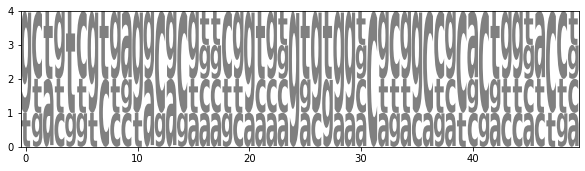

In [48]:
# performs Sequence Logo by creating counts matrix from sequence_logo_1
Multi_counts_df = lm.alignment_to_matrix(sequences=SequenceLogos_list, to_type='counts', characters_to_ignore='.-X')
# visualize the sequence logo
lm.Logo(Multi_counts_df)

In [49]:
# performs cut_sequences function from the 2000th base to the 2050th base and called it sequence_logo_1
sequence_logo_2 = cut_sequences(aligned, 2000, 2050)
print(sequence_logo_2)

['gggttttgccatgttggccaggctggtctcgaactcctgacctcaaacaa', 'cagtggtagtgtgcacttagcatagacagcactgagaaactgacaactca', 'atttacattccaggaggacattcattaagatcatagttctaatccagatt', 'caagcacaaaacactggaattaggaattattgtgtgaaaggataggcgtg']


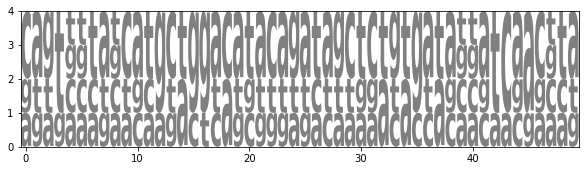

In [51]:
# performs Sequence Logo by creating counts matrix from sequence_logo_1
Multi_counts_df = lm.alignment_to_matrix(sequences=sequence_logo_2, to_type='counts', characters_to_ignore='.-X')
# visualize the sequence logo
lm.Logo(Multi_counts_df)

### Homology Modeling & 3D Measurements

Homology modeling is able to construct a protein model of the target protein from its amino acid sequence and an experimental three-dimensional structure. Here, I will use homology modeling by human interferon receptor 1 template to predict the protein model of the mouse interferon receptor 1. By comparing the predicted mouse model of interferon receptor 1 and the template human model of interferon receptor 1, I will be able to determine any similarities or differences in their secondary to tertiary structure.

3D Measurement is used to further analyze the structures of two models, this will allows us to determine any distinct properties of each interferon receptor 1 model to assess the similarities and difference between the human and mouse interferon receptor 1.


In [15]:
# create a PDBParser object and named it parser
parser = PDBParser()

In [53]:
# import mouse IFNAR1 model "model_01.pdb" from homology modeling and called it structure
structure = parser.get_structure("IFNAR1_mouse_predicted", "model_01.pdb")

In [54]:
# visualize the predicted mouse model in 3D
view = nv.show_biopython(structure)
view

NGLWidget()

Biounit Oligo State: Hetero-trimer

Method:	X-ray, 4.00 Å

GMQE score: 0.41

Seq Similarity:	0.44

Coverage: 0.68

In [18]:
# create a polypeptide builder for mouse IFNAR1 model
polypeptide_builder = CaPPBuilder()
counter = 1
# use for loop to generate the sequences of the protein from the mouse model pdb called structure
for polypeptide in polypeptide_builder.build_peptides(structure):
    seq = polypeptide.get_sequence()
    print(f"Sequence: {counter}, Length: {len(seq)}")
    print(seq)
    counter += 1

Sequence: 1, Length: 299
PENIDVYIIDDNYTLKWSSHGESMGSVTFSAEYRTKDEAKWLKVPECQHTTTTKCEFSLLDTNVYIKTQFRVRAEEGNSTSSWNEVDPFIPFYTAHMSPPEVRLEAEDKAILVHISPPGQDGNMWALEKPSFSYTIRIWQKSSSDKKTINSTYYVEKIPELLPETTYCLEVKAIHPSLKKHSNYSTVQCISTTVANKMPVPGNLQVDAQGKSYVLKWDYIASADVLFRAQWLPGYSKSSSGSRSDKWKPIPTCANVQTTHCVFSQDTVYTGTFFLHVQASEGNHTSFWSEEKFIDSQKH


In [19]:
# change the seqeunces into string type and use ProteinAnalysis method to analyze the sequence
analyzed_seq = ProteinAnalysis(str(seq))

In [20]:
# this method generates the amino acid percentage of the predicted IFNAR1 mouse model
analyzed_seq.get_amino_acids_percent()

{'A': 0.05016722408026756,
 'C': 0.020066889632107024,
 'D': 0.05016722408026756,
 'E': 0.06688963210702341,
 'F': 0.04013377926421405,
 'G': 0.03678929765886288,
 'H': 0.033444816053511704,
 'I': 0.05351170568561873,
 'K': 0.07692307692307693,
 'L': 0.05351170568561873,
 'M': 0.013377926421404682,
 'N': 0.04013377926421405,
 'P': 0.056856187290969896,
 'Q': 0.04013377926421405,
 'R': 0.023411371237458192,
 'S': 0.11371237458193979,
 'T': 0.08695652173913043,
 'V': 0.06688963210702341,
 'W': 0.030100334448160536,
 'Y': 0.046822742474916385}

In [21]:
# this method generates the percentage of helix, turn, sheet of the predicted IFNAR1 mouse model
analyzed_seq.secondary_structure_fraction()

(0.29096989966555187, 0.24749163879598662, 0.18394648829431437)

In [22]:
# this method provides the hydrophobicity of the predicted mouse model
# A higher value is more hydrophobic. A lower value is more hydrophilic
analyzed_seq.gravy()

-0.5451505016722408

In [23]:
# import human IFNAR1 template model "3se3.1.pdb" from homology modeling and called it structure2
structure2 = parser.get_structure("IFNAR1_human_template", "3se3.1.pdb")
# visualize the predicted mouse model in 3D
view = nv.show_biopython(structure2)
view

NGLWidget()

In [24]:
# create a polypeptide builder for human IFNAR1 template model
polypeptide_builder2 = CaPPBuilder()
counter2 = 1
# use for loop to generate the sequences of the protein from the human model pdb called structure2
for polypeptide2 in polypeptide_builder.build_peptides(structure2):
    seq2 = polypeptide2.get_sequence()
    print(f"Sequence: {counter2}, Length: {len(seq2)}")
    print(seq2)
    counter2 += 1

Sequence: 1, Length: 16
PQKVEVDIIDDNFILR
Sequence: 2, Length: 214
VTFSFDYQKTGMDNWIKLSGCQNITSTKCNFSSLKLNVYEEIKLRIRAEKENTSSWYEVDSFTPFRKAQIGPPEVHLEAEDKAIVIHISPGTKDSVMWALDGLSFTYSLVIWKNSSGVEERIENIYSRHKIYKLSPETTYCLKVKAALLTSWKIGVYSPVHCIKTTVENELPPPENIEVSVQNQNYVLKWDYTYANMTFQVQWLHAFLKRNPGN
Sequence: 3, Length: 55
YKWKQIPDCENVKTTQCVFPQNVFQKGIYLLRVQASDGNNTSFWSEEIKFDTEIQ
Sequence: 4, Length: 36
SLGSRRTLMLLAQMRRISLFSCLKDRHDFGFPQEEF
Sequence: 5, Length: 49
ETIPVLYNMISQIFNLFSTKDSSAAWDETLLDKFYTELYQQLNDLEACV
Sequence: 6, Length: 43
DSILAVRKYFQRITLYLKEKKYSPCAWEVVRAEIMRSFSLSTN
Sequence: 7, Length: 119
SCTFKISLRNFRSILSWELKNHSIVPTHYTLLYTIMSKPEDLKVVKNCANTTRSFCDLTDEWRSTHEAYVTVLEGFSGNTTLFSCSHNFWLAIDMSFEPPEFEIVGFTNHINVMVKFPS
Sequence: 8, Length: 21
QFDLSLVIEEQSEGIVKKHKP
Sequence: 9, Length: 43
MSGNFTYIIDKLIPNTNYCVSVYLEHSDEQAVIKSPLKCTLLP


In [25]:
# change the seqeunces into string type and use ProteinAnalysis method to analyze the sequence
analyzed_seq2 = ProteinAnalysis(str(seq2))

In [26]:
# this method generates the amino acid percentage of the template IFNAR1 human model
analyzed_seq2.get_amino_acids_percent()

{'A': 0.023255813953488372,
 'C': 0.046511627906976744,
 'D': 0.046511627906976744,
 'E': 0.046511627906976744,
 'F': 0.023255813953488372,
 'G': 0.023255813953488372,
 'H': 0.023255813953488372,
 'I': 0.09302325581395349,
 'K': 0.06976744186046512,
 'L': 0.11627906976744186,
 'M': 0.023255813953488372,
 'N': 0.06976744186046512,
 'P': 0.06976744186046512,
 'Q': 0.023255813953488372,
 'R': 0.0,
 'S': 0.09302325581395349,
 'T': 0.06976744186046512,
 'V': 0.06976744186046512,
 'W': 0.0,
 'Y': 0.06976744186046512}

In [27]:
# this method generates the percentage of helix, turn, sheet of the template IFNAR1 human model
analyzed_seq.secondary_structure_fraction()

(0.29096989966555187, 0.24749163879598662, 0.18394648829431437)

In [28]:
# this method provides the hydrophobicity of the template human model
# A higher value is more hydrophobic. A lower value is more hydrophilic
analyzed_seq2.gravy()

0.08837209302325584

## Analysis of the Result

The sequence alignment score is calculated by the number of correctly aligned base. Every matched base will have a "+1" score and every mis-match or gap will lose no points. Thus the score for the pairwise alignment is 178. Since the sequence of inteferon receptors subunit 1 for both the humans and mouse model are longer than 20,000 base-pair, a score of 178 is comparitively small and this represents that the sequence of inteferon receptors subunit 1 are not similar between humans and mouse. The sequence logos generated by the multiple sequence alignment analysis further confirms my suspecion. The first sequence logo is produced by the first 50 nucleotides in the aligned sequence after Multiple Sequence Alignment. The first sequence logo shows that there is only 1 nucleotide out of the 50 nucleotides that all four sequences have the same nucleotide. The second sequence logo is produced by the 2000th to 2050th nucleotides. It shows more diversity than the first sequence logo visualization because the second sequence logo does not have any common nucleotide that is shared between all 4 species, and only a few nucleotides that are shared between 3 species. According to both sequence logos and the pairwise sequence analysis, we could say that there is little similarity between the IFNAR1 mouse DNA sequence and the IFNAR1 human DNA sequence.

To further confirm the result from Pairwise Sequence Analysis, Multiple Sequence Analysis/Sequence logos, I used homology modeling prediction by Swiss Model to generate a predicted 3D mouse inteferon receptor subunit 1 from the human inteferon receptor subunit 1 template. The GMQE score of the predicted mouse model is 0.41 which means that the expected accuracy of the homology modeling alignment is 41 out of 100 points. The Seq Similarity between the mouse inteferon receptor model and human inteferon receptor template is 0.44, representing a 44 percent similar between the amino acid components between two models. The 3D measurement result shows the primary and tertiary structural difference between the mouse inteferon receptor model and the human inteferon receptor model. Serine is most concentrated in the mouse inteferon receptor model and Leucine is most concentrated in the human inteferon receptor model. This demonstrates the difference between the primary structure of the two models. The mouse model has a 29.1% alpha helix percentage, 24.7% turn percentage, 18.4% beta sheet percentage, whereas the human template has a 37.2% alpha helix percentage, 25.6% turn percentage, and 20.9% beta sheet percentage. This shows that there is still a big difference between the tertiary structure of the two models. The hydrophobicity of the mouse model is -0.55 and the hydrophobicity of the human model is 0.08. This shows that the mouse interferon receptor model is slightly hydrophilic where as the human inteferon receptor model is slightly hydrophobic. This could lead to the difference between two binding sites thus they are more likely to bind to different compound. 

Therefore, from the result of Pairwise Sequence Analysis, Multiple Sequence Analysis/Sequence Logos, it shows that there is little similarity between the DNA sequence between the human IFNAR1 and mouse IFNAR1. The Homology Modeling/3D Protein Measurements also shows difference in secondary and tertiary structure between the human IFNAR1 and mouse IFNAR1. Thus we could infer that interferon receptors of human T lymphocytes are not similar to the interferon receptors of mouse T lymphocytes, then the Mycobacterium Vaccae might not be able to have the same impact which is to stimulate the human T lymphocytes to activate the human immune pathways.